In [1]:
#Let's start with importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

# Reading the train data

In [2]:
#Read csv file and convert into Dataframe
data_train=pd.read_csv(r'D:\DataTrained\Flip Robo Technology Internship\Malignant Comments Classifier Project\train.csv')
data_train

id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        malignant  highly_malignant  rude  threat  abuse  loathe  
0               0                 0     0       0      0       0  
1               0                 0     0       0      0       0  
2               0                 0     0       0      0       0  
3               0                 0     0       0      0       0  
4               0                 0     0       0      0       0  
...           ...               ...   ...     ...    ...     ...  
159566          0                 0     0       0      0       0  
159567          0                 0     0       0      0       0  
159568          0                 0     0       0      0       0  
159569          0                 0     0       0      0       0  
159570          0                 0     0       0      0       0  

[159571 rows x 8 columns]

In [3]:
#shape of file
data_train.shape

(159571, 8)

In [4]:
#Lets see the columns present in the dataset
data_train.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [5]:
# Checking for data types of the columns
data_train.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [6]:
# Checking for null values of the columns
data_train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [7]:
# Checking for null values in object datatype columns

for column in data_train:
    data_train[column]=data_train[column].replace(' ',np.nan)
    data_train[column]=data_train[column].replace('"', np.nan)
    data_train[column]=data_train[column].replace('--',np.nan)

In [8]:
# Checking for null values of the columns
data_train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [9]:
#As the id is unique to all, its safe to drop this column

data_train=data_train.drop(columns=["id"])

# Visualization of the Data and Encoding object data

In [10]:
comment=list(data_train["comment_text"])

In [11]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["comment_text"])
data_train["comment_text"]=df

0    157976
1      1595
Name: highly_malignant, dtype: int64


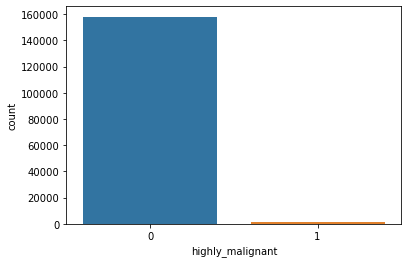

In [12]:
ax=sns.countplot(x="highly_malignant", data=data_train)
print(data_train["highly_malignant"].value_counts())

In [13]:
hm=list(data_train["highly_malignant"])

for j in range(0,159571):
    if hm[j]==1:
        print("-----------Highly Malignant-------------")
        print(comment[j])
        print("----------------------------------------")       

-----------Highly Malignant-------------
COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
----------------------------------------
-----------Highly Malignant-------------
Stupid peace of shit stop deleting my stuff asshole go die and fall in a hole go to hell!
----------------------------------------
-----------Highly Malignant-------------
you are a stupid fuck 

and your mother's cunt stinks
----------------------------------------
-----------Highly Malignant-------------
Hi 

Im a fucking bitch.

50.180.208.181
----------------------------------------
-----------Highly Malignant-------------
What a motherfucking piece of crap those fuckheads for blocking us!
----------------------------------------
-----------Highly Malignant-------------
"You know, I was thinking...

Nobody really attacked me before I revealed my age here.  After I announced that I was 14, I was subject to a constant storm of harassment and abuse.

The same thing goes for when I was on The Sandbox when I was 11.  Befo

# 
Words like fuck, fucking, cocksucker, fucker, motherfucking, motherfucker, suck, dick, ass, scum, asshole, bitch, kill,  are most common in highly malignant comments

0    151122
1      8449
Name: rude, dtype: int64


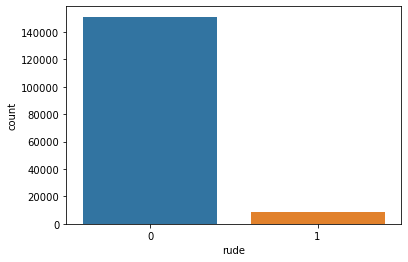

In [14]:
ax=sns.countplot(x="rude", data=data_train)
print(data_train["rude"].value_counts())

In [15]:
r=list(data_train["rude"])

for j in range(0,159571):
    if r[j]==1:
        print("------------------Rude-------------------")
        print(comment[j])
        print("----------------------------------------") 

------------------Rude-------------------
COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
----------------------------------------
------------------Rude-------------------
You are gay or antisemmitian? 

Archangel WHite Tiger

Meow! Greetingshhh!

Uh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...

1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!

2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!

3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore!

Beware of the Dark Side!
----------------------------------------
------------------Rude-------------------
FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!
----------------------------------------
----------------

# 
Words like cocksucker, gay, idiot, die, antisemmitian, motherfucker, fuck, fucking, hell, fucked, fucker, ass, shit, hell, dick, scum, asshole, bitch, schmucks, racists, dead, vandalism are some common words in rude comments 

0    159093
1       478
Name: threat, dtype: int64


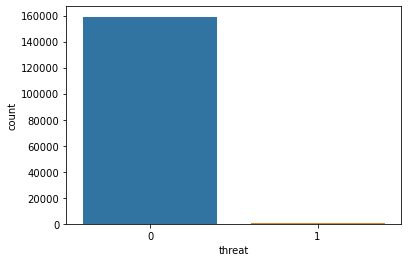

In [16]:
ax=sns.countplot(x="threat", data=data_train)
print(data_train["threat"].value_counts())

In [17]:
t=list(data_train["threat"])

for j in range(0,159571):
    if t[j]==1:
        print("------------------Threat-------------------")
        print(comment[j])
        print("----------------------------------------") 

------------------Threat-------------------
Hi! I am back again!
Last warning!
Stop undoing my edits or die!
----------------------------------------
------------------Threat-------------------
I think that your a Fagget get a oife and burn in Hell I hate you 'm sorry we cant have any more sex i'm running out of conndoms
----------------------------------------
------------------Threat-------------------
I'm also a sock puppet of this account...SUPRISE!!
-sincerely,
            The man that will track you down from the Internet and kill you
----------------------------------------
------------------Threat-------------------
Fuck you, Smith. Please have me notified when you die. I want to dance on your grave.
----------------------------------------
------------------Threat-------------------
WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'LL FIND OUT WHERE YOU LIVE, SODOMIZE YOUR WIFE AND THEN BURN YOUR HOUSE DOWN. FUCK YOU YOU FUCKING QUEER.
----------------------------------------
-----

# 
Words like die, kill, fuck, grave, bitch, kick, ass, burn, bitch, fucking are common words in threat comments

0    151694
1      7877
Name: abuse, dtype: int64


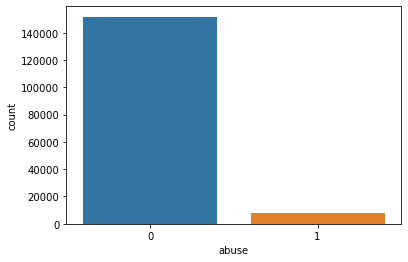

In [18]:
ax=sns.countplot(x="abuse", data=data_train)
print(data_train["abuse"].value_counts())

In [19]:
a=list(data_train["abuse"])

for j in range(0,159571):
    if a[j]==1:
        print("------------------Abuse-------------------")
        print(comment[j])
        print("----------------------------------------") 

------------------Abuse-------------------
COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
----------------------------------------
------------------Abuse-------------------
You are gay or antisemmitian? 

Archangel WHite Tiger

Meow! Greetingshhh!

Uh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...

1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!

2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!

3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore!

Beware of the Dark Side!
----------------------------------------
------------------Abuse-------------------
FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!
----------------------------------------
-------------

# 
Words like gay, antisemmitia, coksucker, fuck, ass, cunts, schmuck, kill, asshole, idiot are common words in abuse comments

0    158166
1      1405
Name: loathe, dtype: int64


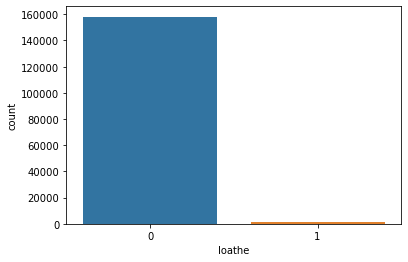

In [20]:
ax=sns.countplot(x="loathe", data=data_train)
print(data_train["loathe"].value_counts())

In [21]:
l=list(data_train["loathe"])

for j in range(0,159571):
    if l[j]==1:
        print("------------------Loathe-------------------")
        print(comment[j])
        print("----------------------------------------") 

------------------Loathe-------------------
You are gay or antisemmitian? 

Archangel WHite Tiger

Meow! Greetingshhh!

Uh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...

1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!

2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!

3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore!

Beware of the Dark Side!
----------------------------------------
------------------Loathe-------------------
A pair of jew-hating weiner nazi schmucks.
----------------------------------------
------------------Loathe-------------------
I think that your a Fagget get a oife and burn in Hell I hate you 'm sorry we cant have any mo

# 
Words like antisemmitian, schmucks, kill, fuck, gay, cock, bitch, ass, bastard, fucking are common words in loathe comments

0    144277
1     15294
Name: malignant, dtype: int64


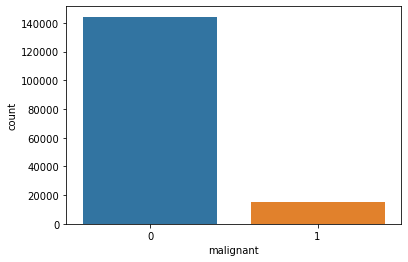

In [22]:
ax=sns.countplot(x="malignant", data=data_train)
print(data_train["malignant"].value_counts())

In [23]:
#Statistical Analysis
data_train.describe()

comment_text      malignant  highly_malignant           rude  \
count  159571.00000  159571.000000     159571.000000  159571.000000   
mean    79785.00000       0.095844          0.009996       0.052948   
std     46064.32424       0.294379          0.099477       0.223931   
min         0.00000       0.000000          0.000000       0.000000   
25%     39892.50000       0.000000          0.000000       0.000000   
50%     79785.00000       0.000000          0.000000       0.000000   
75%    119677.50000       0.000000          0.000000       0.000000   
max    159570.00000       1.000000          1.000000       1.000000   

              threat          abuse         loathe  
count  159571.000000  159571.000000  159571.000000  
mean        0.002996       0.049364       0.008805  
std         0.054650       0.216627       0.093420  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000

# Checking Correlation

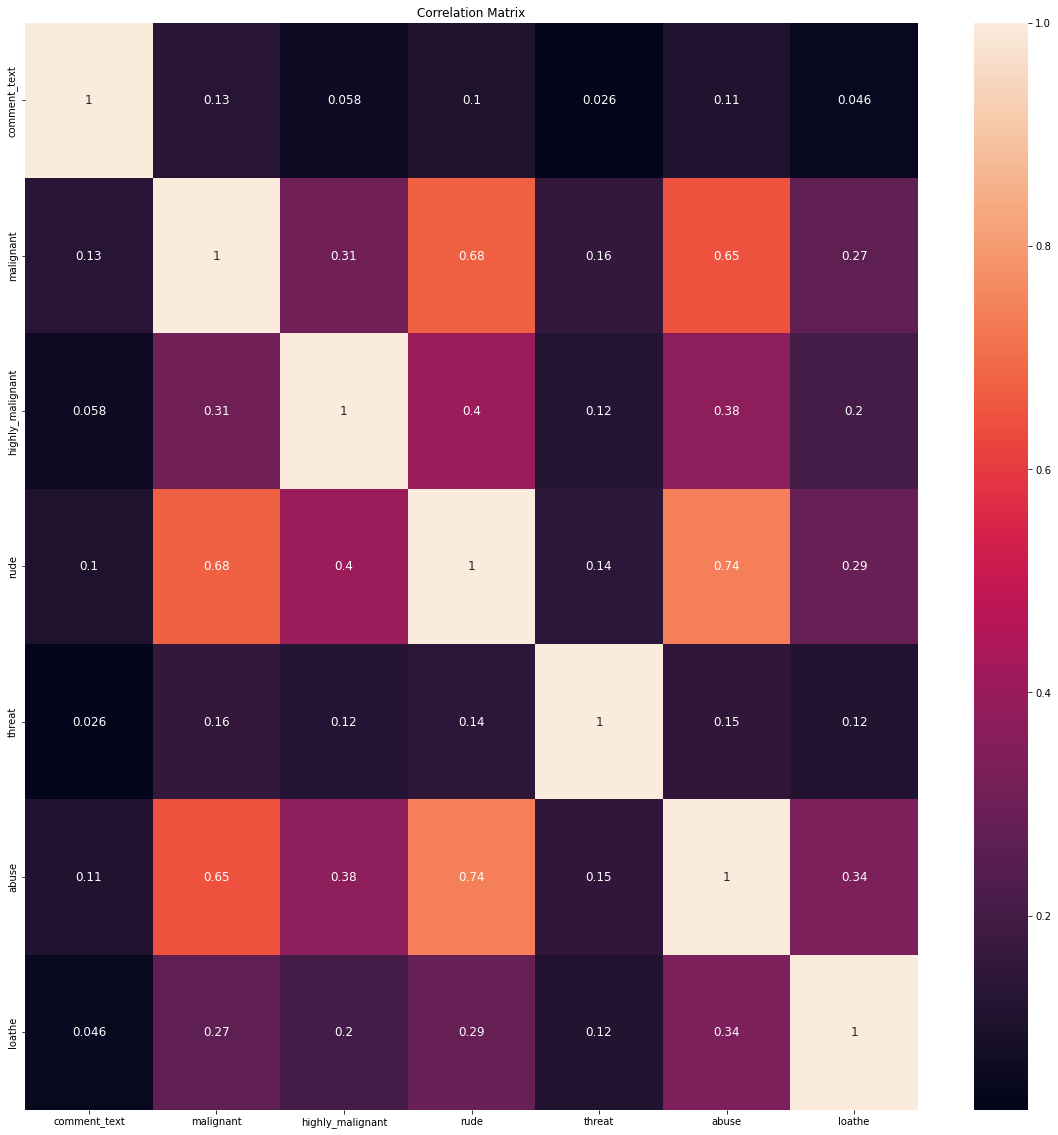

In [24]:
#Lets view the heatmap
corr_mat=data_train.corr()

#size of the canvas
plt.figure(figsize=[20,20])

#plot the correlation matrix
sns.heatmap(corr_mat,annot=True, annot_kws={'size':12})
plt.title("Correlation Matrix")
plt.show()

In [25]:
#Let's print the correlation coefficient for the Prediction of Rate

corr_matrix=data_train.corr()
corr_matrix["malignant"].sort_values(ascending=False)

malignant           1.000000
rude                0.676515
abuse               0.647518
highly_malignant    0.308619
loathe              0.266009
threat              0.157058
comment_text        0.132016
Name: malignant, dtype: float64

# Checking for outliers

In [26]:
data_train.shape

(159571, 7)

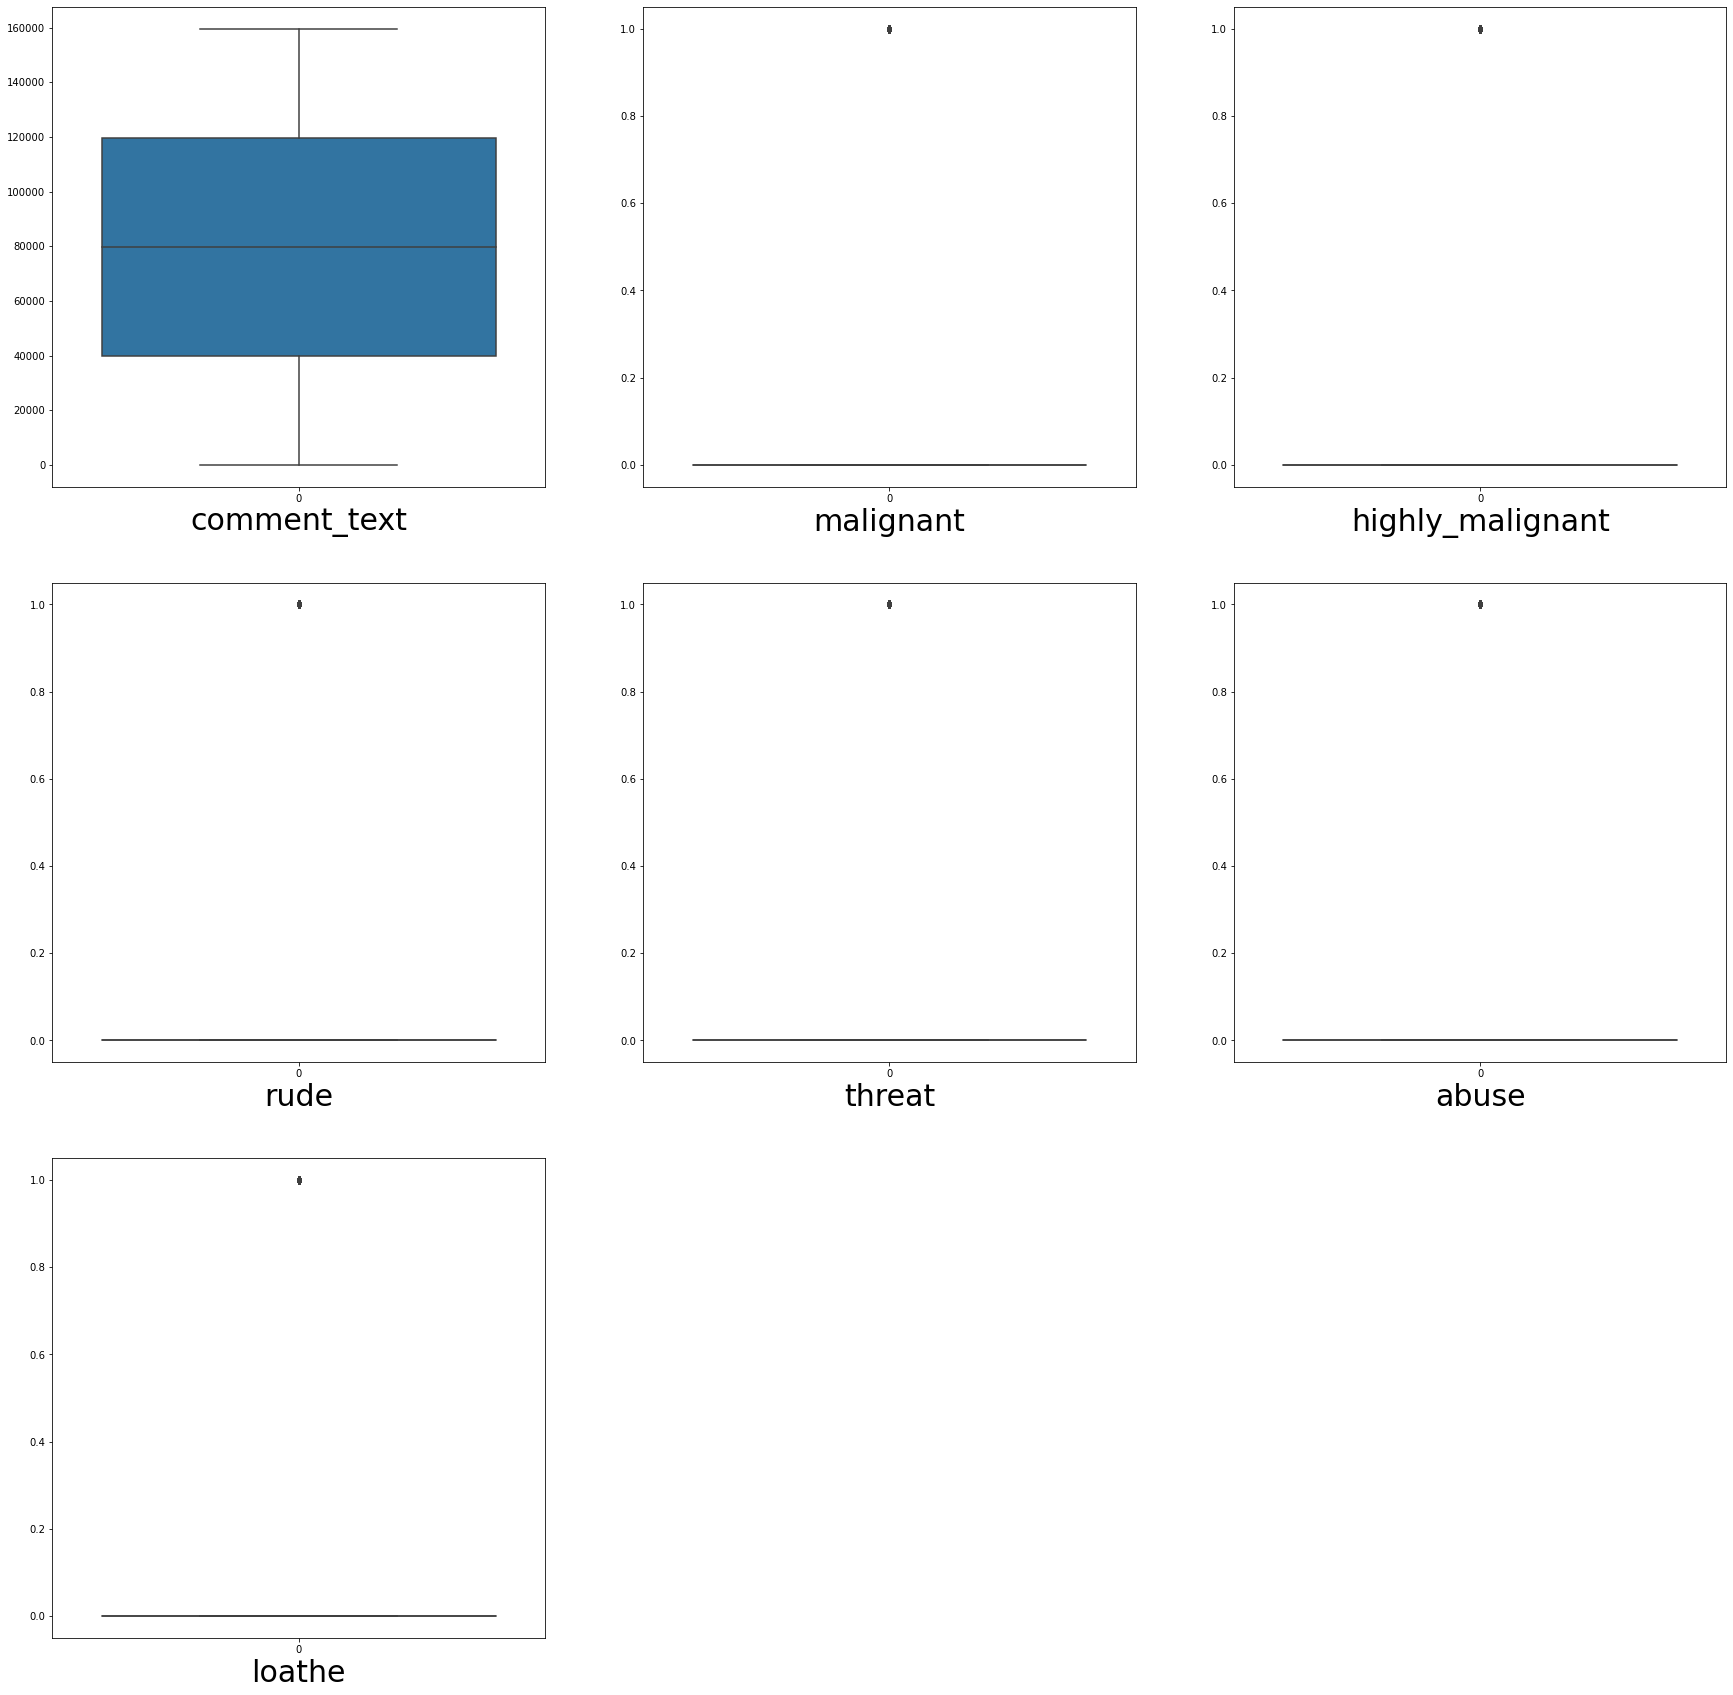

In [27]:
#visulaize the outliers using boxplot
plt.figure(figsize=(30,30))
graph=1

for column in data_train:
    if graph<=7:
        ax=plt.subplot(3,3,graph)
        sns.boxplot(data=data_train[column], orient='v')
        plt.xlabel(column,fontsize=30)
    graph=graph+1
plt.show()

In [28]:
#remove outliers using zscore technique
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data_train))
z.shape

(159571, 7)

In [29]:
threshold=3
print(np.where(z>3))

(array([     6,      6,      6, ..., 159554, 159554, 159554], dtype=int64), array([1, 2, 3, ..., 1, 3, 5], dtype=int64))


In [30]:
data_new=data_train[(z<3).all(axis=1)]
print(data_train.shape)
print(data_new.shape)

(159571, 7)
(143346, 7)


# 
As data loss is 10.17%, the outliers are tolerated

# Divide Data Set into x_train and y_train

In [31]:
y_train=data_train['malignant']
x_train=data_train.drop(columns=['malignant'])

# Visualizing Relationship

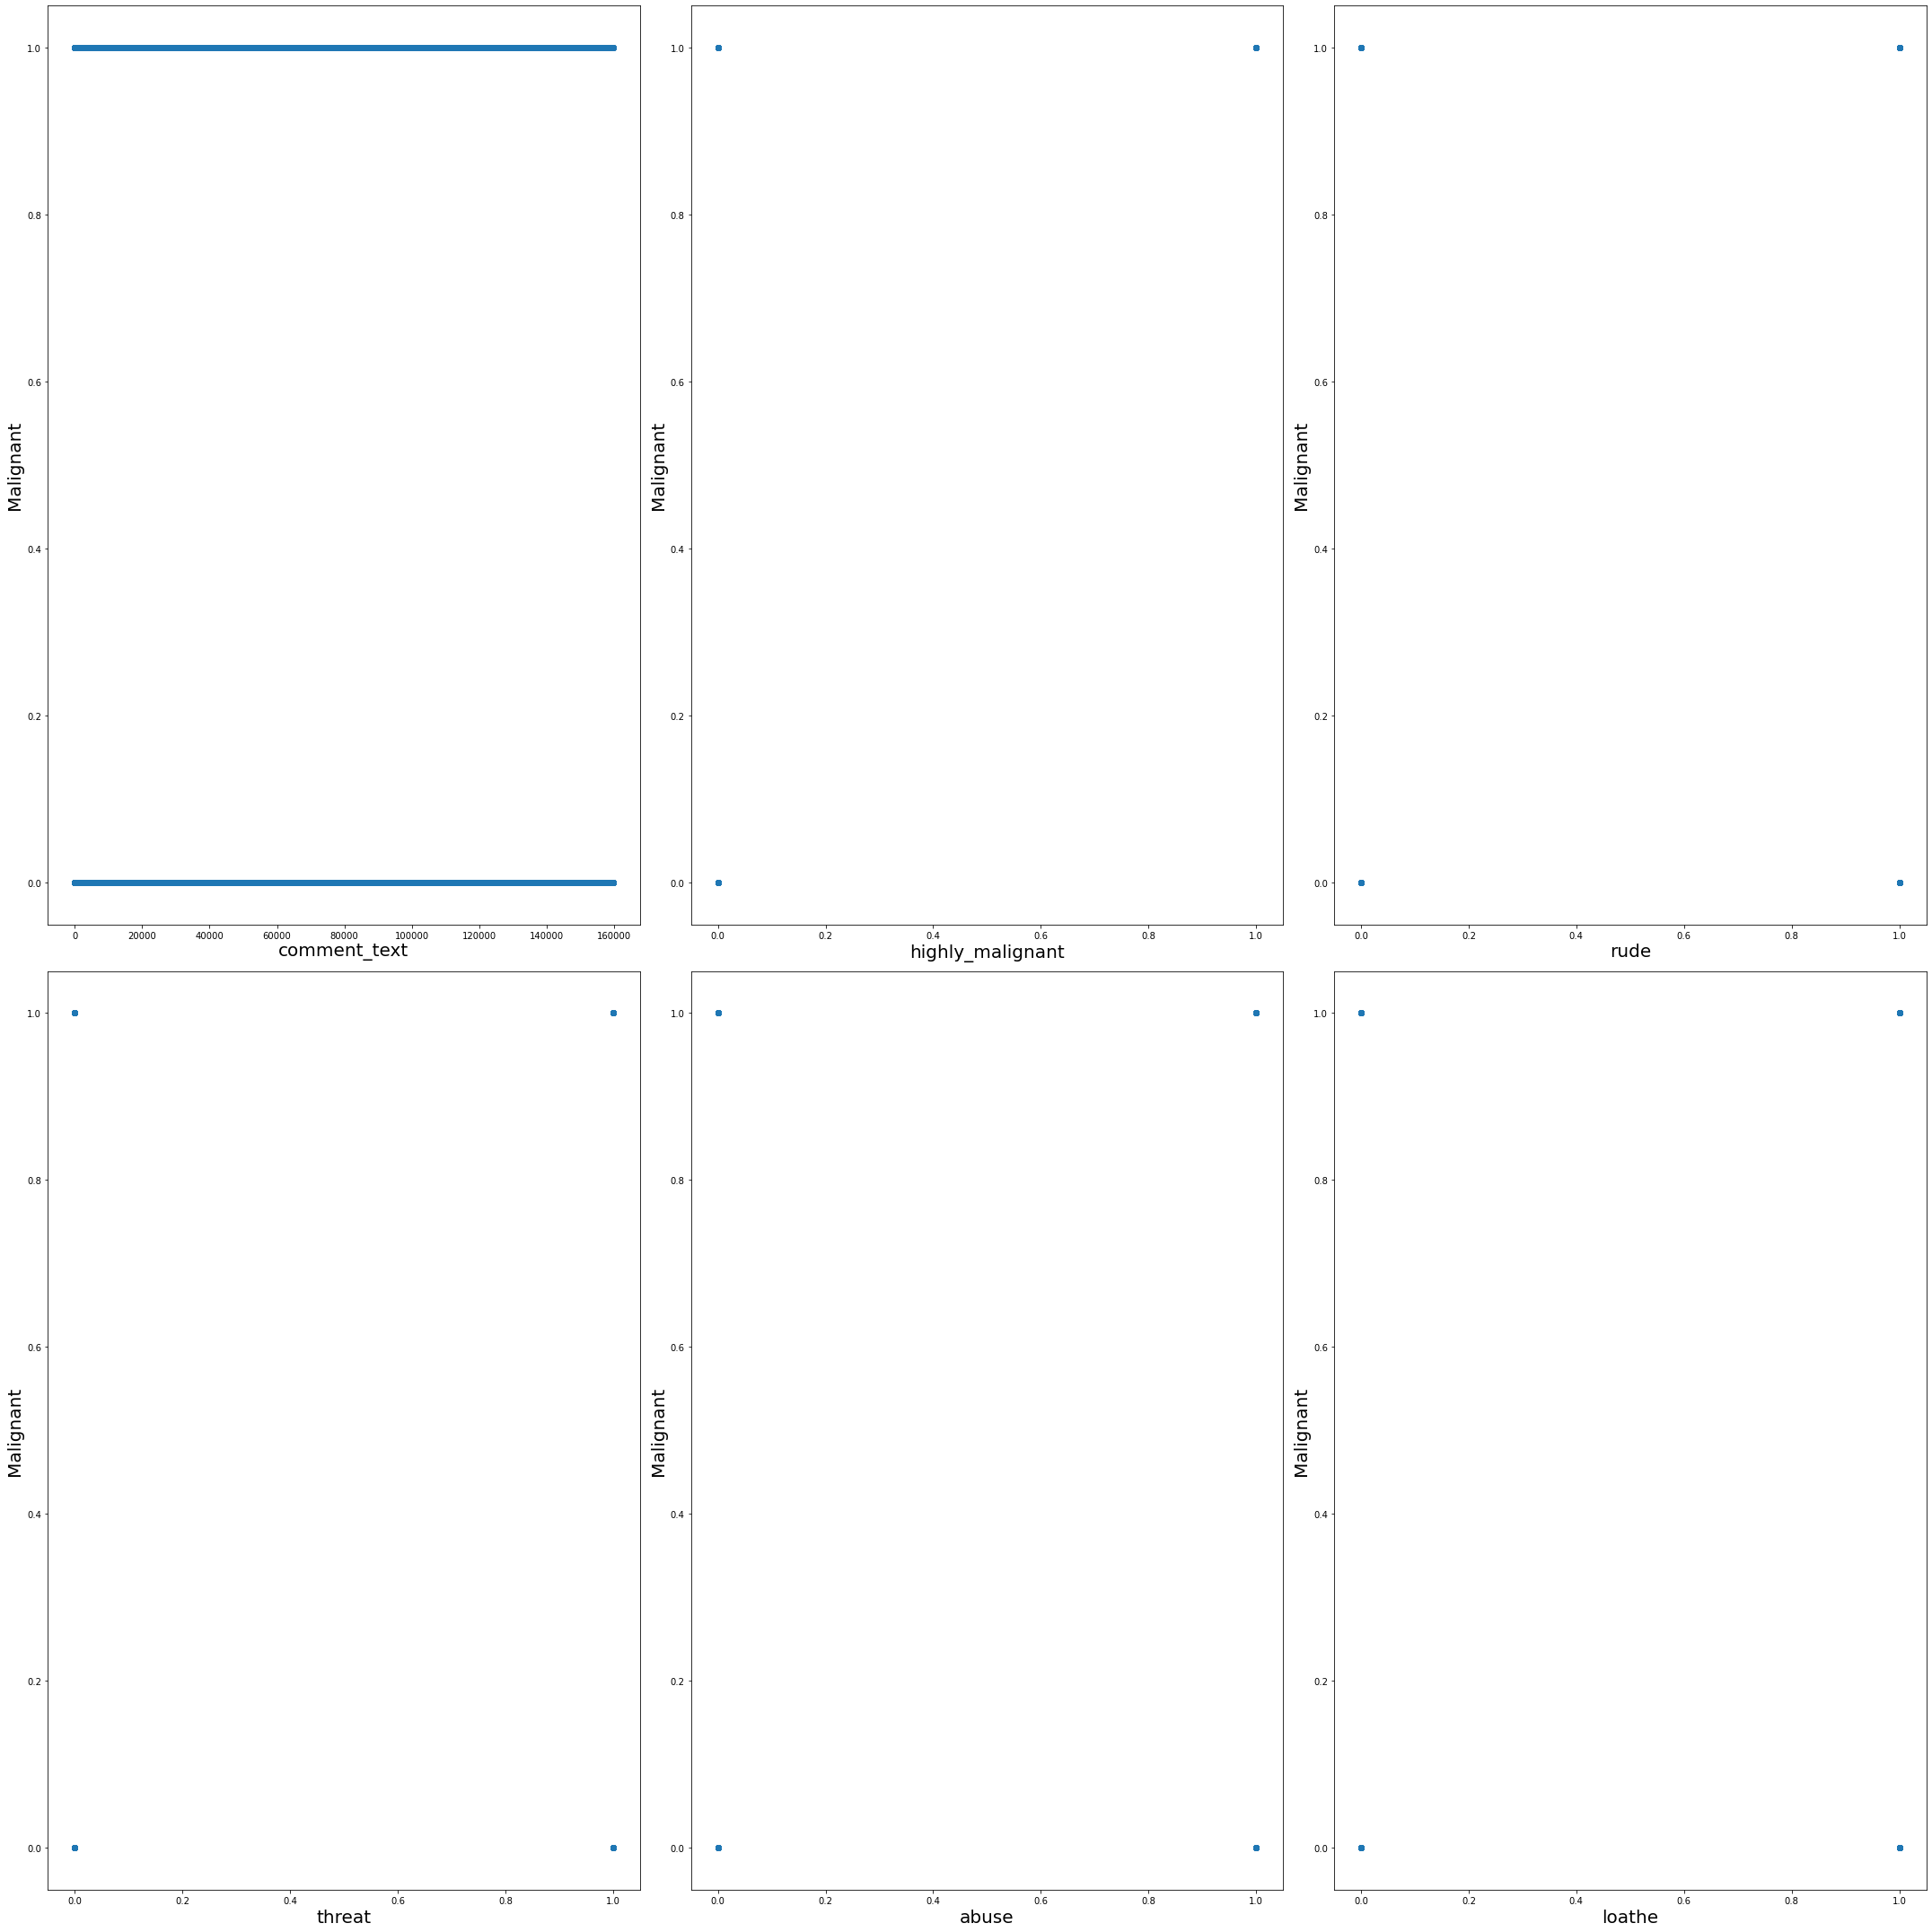

In [32]:
plt.figure(figsize=(30,30))
plotnumber=1

for column in x_train:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        plt.scatter(x_train[column],y_train)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Malignant', fontsize=20)
    plotnumber=plotnumber+1
plt.tight_layout()

# Checking for skewness

In [33]:
x_train.skew().sort_values(ascending=False)

threat              1.818900e+01
loathe              1.051592e+01
highly_malignant    9.851722e+00
abuse               4.160540e+00
rude                3.992817e+00
comment_text        1.282301e-19
dtype: float64

# Transforming Data to remove skewness

In [34]:
from sklearn.preprocessing import power_transform
x_n=power_transform(x_train)

In [35]:
#Checking if skewness was rectified
x_skew=pd.DataFrame(x_n, columns=x_train.columns)
x_skew.skew().sort_values(ascending=False)

threat              18.189001
loathe              10.515923
highly_malignant     9.851722
abuse                4.160540
rude                 3.992817
comment_text        -0.291555
dtype: float64

# Scaling the data

In [36]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x_skew)

In [37]:
x_train=X_scaled

# Reading the test data (x_test)

In [38]:
#Read csv file and convert into Dataframe
data_test=pd.read_csv(r'D:\DataTrained\Flip Robo Technology Internship\Malignant Comments Classifier Project\test.csv')
data_test

id                                       comment_text
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1       0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2       00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3       00017563c3f7919a  :If you have a look back at the source, the in...
4       00017695ad8997eb          I don't anonymously edit articles at all.
...                  ...                                                ...
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...

[153164 rows x 2 columns]

In [39]:
comment=list(data_test["comment_text"])

In [40]:
highly_malignant=[]

for j in range(0,153164):
    n=0
    z=comment[j]
    a=list(z.split(" "))
    l=len(a)
    for i in range(0,l):
        if a[i]=='fuck' or a[i]=='fucking' or a[i]=='cocksucker' or a[i]=='fucker' or a[i]=='motherfucking' or a[i]=='motherfucker' or a[i]=='suck' or a[i]=='dick' or a[i]=='ass' or a[i]=='scum' or a[i]=='asshole' or a[i]=='bitch' or a[i]=='kill':
            n=1
            break
        else:
            n=0
    if n==1:
        highly_malignant.append(1)
    else:
        highly_malignant.append(0)

In [41]:
highly_malignant

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [42]:
data_test['highly_malignant']=highly_malignant

0    144053
1      9111
Name: highly_malignant, dtype: int64


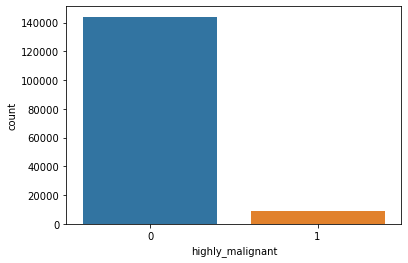

In [43]:
ax=sns.countplot(x="highly_malignant", data=data_test)
print(data_test["highly_malignant"].value_counts())

In [44]:
rude=[]

for j in range(0,153164):
    n=0
    z=comment[j]
    a=list(z.split(" "))
    l=len(a)
    for i in range(0,l):
        if a[i]=='cocksucker' or a[i]=='gay' or a[i]=='idiot' or a[i]=='die' or a[i]=='antisemmitian' or a[i]=='motherfucker' or a[i]=='fucking' or a[i]=='fuck' or a[i]=='hell' or a[i]=='fucked' or a[i]=='fucker' or a[i]=='ass' or a[i]=='shit' or a[i]=='dick' or a[i]=='scum' or a[i]=='asshole' or a[i]=='bitch' or a[i]=='schmucks' or a[i]=='racists' or a[i]=='dead' or a[i]=='vandalism':
            n=1
            break
        else:
            n=0
    if n==1:
        rude.append(1)
    else:
        rude.append(0)       

In [45]:
rude

[1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [46]:
data_test['rude']=rude

0    139288
1     13876
Name: rude, dtype: int64


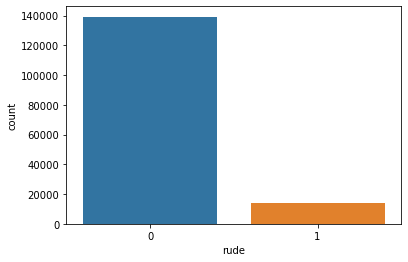

In [47]:
ax=sns.countplot(x="rude", data=data_test)
print(data_test["rude"].value_counts())

In [48]:
threat=[]

for j in range(0,153164):
    n=0
    z=comment[j]
    a=list(z.split(" "))
    l=len(a)
    for i in range(0,l):
        if a[i]=='die' or a[i]=='kill' or a[i]=='fuck' or a[i]=='grave' or a[i]=='bitch' or a[i]=='kick' or a[i]=='ass' or a[i]=='burn' or a[i]=='hell' or a[i]=='fucked' or a[i]=='fucker' or a[i]=='fucking' or a[i]=='dead' :
            n=1
            break
        else:
            n=0
    if n==1:
        threat.append(1)
    else:
        threat.append(0)       

In [49]:
threat

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [50]:
data_test['threat']=threat

0    143313
1      9851
Name: threat, dtype: int64


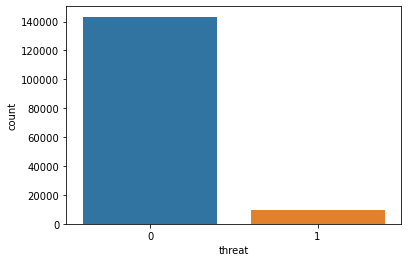

In [51]:
ax=sns.countplot(x="threat", data=data_test)
print(data_test["threat"].value_counts())

In [52]:
abuse=[]

for j in range(0,153164):
    n=0
    z=comment[j]
    a=list(z.split(" "))
    l=len(a)
    for i in range(0,l):
        if a[i]=='gay' or a[i]=='antisemmitian' or a[i]=='cocksucker' or a[i]=='fuck' or a[i]=='ass' or a[i]=='cunts' or a[i]=='ass' or a[i]=='schmuck' or a[i]=='kill' or a[i]=='fucked' or a[i]=='fucker' or a[i]=='fucking' or a[i]=='asshole' or a[i]=='bitch' or a[i]=='idiot':
            n=1
            break
        else:
            n=0
    if n==1:
        abuse.append(1)
    else:
        abuse.append(0)  

In [53]:
abuse

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [54]:
data_test['abuse']=abuse

0    143654
1      9510
Name: abuse, dtype: int64


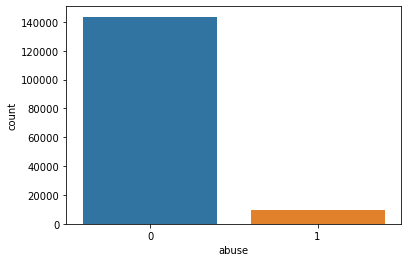

In [55]:
ax=sns.countplot(x="abuse", data=data_test)
print(data_test["abuse"].value_counts())

In [56]:
loathe=[]

for j in range(0,153164):
    n=0
    z=comment[j]
    a=list(z.split(" "))
    l=len(a)
    for i in range(0,l):
        if a[i]=='schmucks' or a[i]=='antisemmitian' or a[i]=='kill' or a[i]=='fuck' or a[i]=='gay' or a[i]=='cock' or a[i]=='bitch' or a[i]=='ass' or a[i]=='bastard' or a[i]=='fucked' or a[i]=='fucker' or a[i]=='fucking' or a[i]=='asshole' or a[i]=='fucking':
            n=1
            break
        else:
            n=0
    if n==1:
        loathe.append(1)
    else:
        loathe.append(0)  

In [57]:
loathe

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [58]:
data_test['loathe']=loathe

0    143947
1      9217
Name: loathe, dtype: int64


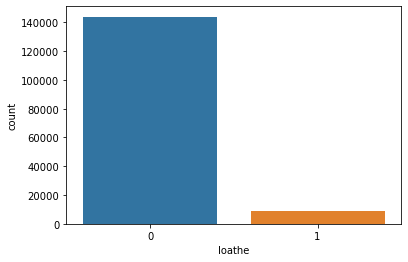

In [59]:
ax=sns.countplot(x="loathe", data=data_test)
print(data_test["loathe"].value_counts())

In [60]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_test["comment_text"])
data_test["comment_text"]=df

In [61]:
#As the id is unique to all, its safe to drop this column

data_test=data_test.drop(columns=["id"])

In [62]:
data_test

comment_text  highly_malignant  rude  threat  abuse  loathe
0             139489                 1     1       1      1       1
1              82945                 0     0       0      0       0
2              15380                 0     0       0      0       0
3              71743                 0     0       0      0       0
4             116535                 0     0       0      0       0
...              ...               ...   ...     ...    ...     ...
153159         51845                 0     0       0      0       0
153160         93347                 0     0       0      0       0
153161         13499                 0     0       0      0       0
153162          8042                 0     0       0      0       0
153163         30249                 0     0       0      0       0

[153164 rows x 6 columns]

# Checking for outliers

In [63]:
data_test.shape

(153164, 6)

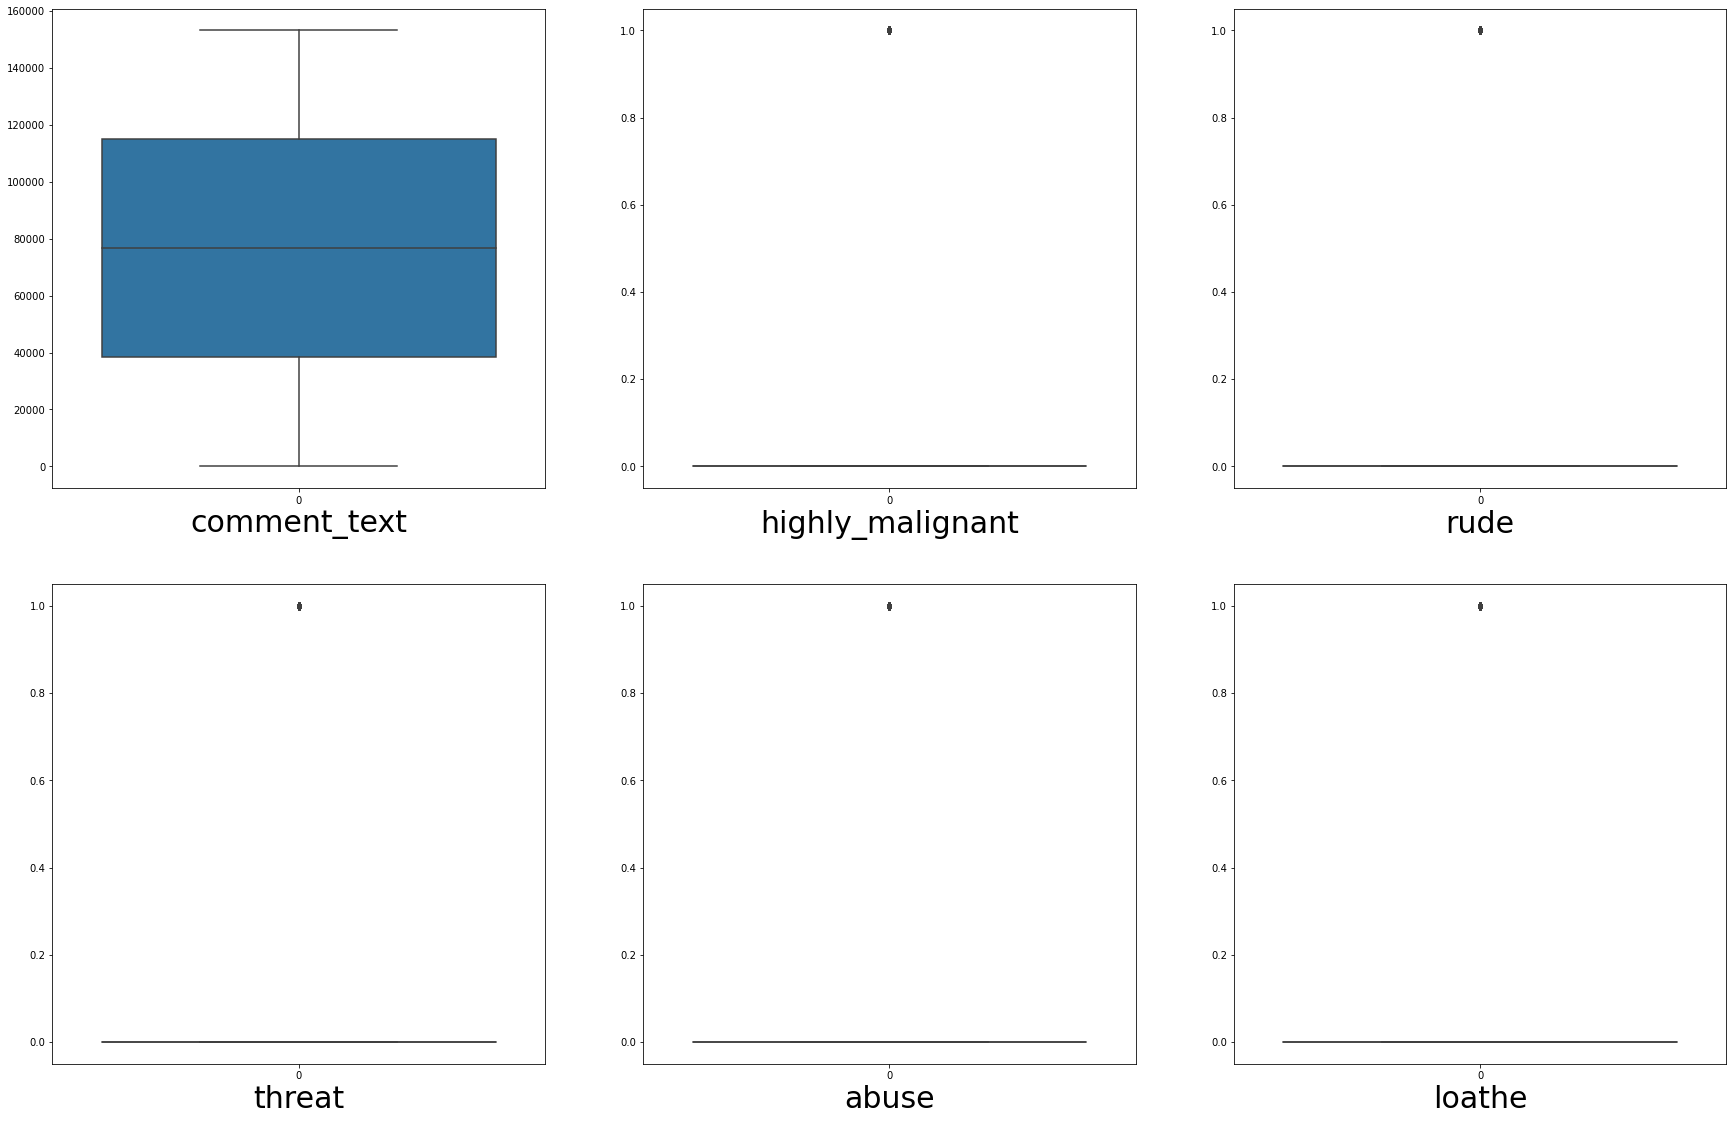

In [64]:
#visulaize the outliers using boxplot
plt.figure(figsize=(30,30))
graph=1

for column in data_test:
    if graph<=7:
        ax=plt.subplot(3,3,graph)
        sns.boxplot(data=data_test[column], orient='v')
        plt.xlabel(column,fontsize=30)
    graph=graph+1
plt.show()

In [65]:
#remove outliers using zscore technique
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data_test))
z.shape

(153164, 6)

In [66]:
threshold=3
print(np.where(z>3))

(array([     0,      0,      0, ..., 153153, 153158, 153158], dtype=int64), array([1, 2, 3, ..., 3, 2, 4], dtype=int64))


In [67]:
data_new=data_test[(z<3).all(axis=1)]
print(data_test.shape)
print(data_new.shape)

(153164, 6)
(137438, 6)


# 
As data loss is 10.27%, outliers are tolerated

# Checking for skewness

In [68]:
x_test=data_test

In [69]:
x_test.skew().sort_values(ascending=False)

highly_malignant    3.724837e+00
loathe              3.698899e+00
abuse               3.629329e+00
threat              3.552049e+00
rude                2.852688e+00
comment_text        1.510704e-18
dtype: float64

# Transforming Data to remove skewness

In [70]:
from sklearn.preprocessing import power_transform
x_n=power_transform(x_test)

In [71]:
#Checking if skewness was rectified
x_skew=pd.DataFrame(x_n, columns=x_test.columns)
x_skew.skew().sort_values(ascending=False)

highly_malignant    3.724837
loathe              3.698899
abuse               3.629329
threat              3.552049
rude                2.852688
comment_text       -0.291553
dtype: float64

# Scaling the data

In [72]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x_skew)

In [73]:
x_test=X_scaled

# Using Logistic Regression Model

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

LR=LogisticRegression()
LR.fit(x_train, y_train)                
predlr=LR.predict(x_train)               
print("Accuracy ",accuracy_score(y_train, predlr)*100)      #accuracy score
print(confusion_matrix(y_train,predlr))
print(classification_report(y_train,predlr))

Accuracy  95.83006937350773
[[143390    887]
 [  5767   9527]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    144277
           1       0.91      0.62      0.74     15294

    accuracy                           0.96    159571
   macro avg       0.94      0.81      0.86    159571
weighted avg       0.96      0.96      0.95    159571



# Using KNeighbors Classifier Model

In [75]:
from sklearn.neighbors import KNeighborsClassifier

kn=KNeighborsClassifier()
kn.fit(x_train, y_train)
predkn=kn.predict(x_train)
print("Accuracy ",accuracy_score(y_train, predkn)*100)      #accuracy score
print(confusion_matrix(y_train,predkn))
print(classification_report(y_train,predkn))

Accuracy  96.10894210100834
[[143309    968]
 [  5241  10053]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    144277
           1       0.91      0.66      0.76     15294

    accuracy                           0.96    159571
   macro avg       0.94      0.83      0.87    159571
weighted avg       0.96      0.96      0.96    159571



# Using Decision Tree Classifier

In [76]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt=dt.predict(x_train)
print("Accuracy ",accuracy_score(y_train, preddt)*100)      #accuracy score
print(confusion_matrix(y_train,preddt))
print(classification_report(y_train,preddt))

Accuracy  100.0
[[144277      0]
 [     0  15294]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    144277
           1       1.00      1.00      1.00     15294

    accuracy                           1.00    159571
   macro avg       1.00      1.00      1.00    159571
weighted avg       1.00      1.00      1.00    159571



# Using Random Forest Classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train, y_train)
predrf=rf.predict(x_train)
print("Accuracy ",accuracy_score(y_train, predrf)*100)      #accuracy score
print(confusion_matrix(y_train,predrf))
print(classification_report(y_train,predrf))

Accuracy  99.99122647598875
[[144276      1]
 [    13  15281]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    144277
           1       1.00      1.00      1.00     15294

    accuracy                           1.00    159571
   macro avg       1.00      1.00      1.00    159571
weighted avg       1.00      1.00      1.00    159571



# Using AdaBoost Classifier

In [78]:
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier()
ada.fit(x_train, y_train)
predada=ada.predict(x_train)
print("Accuracy ",accuracy_score(y_train, predada)*100)      #accuracy score
print(confusion_matrix(y_train,predada))
print(classification_report(y_train,predada))

Accuracy  95.48163513420359
[[143629    648]
 [  6562   8732]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    144277
           1       0.93      0.57      0.71     15294

    accuracy                           0.95    159571
   macro avg       0.94      0.78      0.84    159571
weighted avg       0.95      0.95      0.95    159571



# Using Gradient Boosting Classifier

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt= GradientBoostingClassifier()
gbdt.fit(x_train, y_train)
gbdt_pred=gbdt.predict(x_train)
print("Accuracy ",accuracy_score(y_train, gbdt_pred)*100)      #accuracy score
print(confusion_matrix(y_train,gbdt_pred))
print(classification_report(y_train,gbdt_pred))

Accuracy  95.87268363299096
[[143363    914]
 [  5672   9622]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    144277
           1       0.91      0.63      0.75     15294

    accuracy                           0.96    159571
   macro avg       0.94      0.81      0.86    159571
weighted avg       0.96      0.96      0.96    159571



# Using SVC

In [80]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train, y_train)
ad_pred=svc.predict(x_train)
print("Accuracy ",accuracy_score(y_train, ad_pred)*100)      #accuracy score
print(confusion_matrix(y_train,ad_pred))
print(classification_report(y_train,ad_pred))

Accuracy  95.86579014983926
[[143346    931]
 [  5666   9628]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    144277
           1       0.91      0.63      0.74     15294

    accuracy                           0.96    159571
   macro avg       0.94      0.81      0.86    159571
weighted avg       0.96      0.96      0.96    159571



# Cross Validation

In [81]:
from sklearn.model_selection import cross_val_score

#validation accuracy
scr=cross_val_score(LR,x_train,y_train,cv=5)
print("Cross validation score of Logistic Regression: ", scr.mean())

Cross validation score of Logistic Regression:  0.958288166367055


In [82]:
scr2=cross_val_score(kn,x_train,y_train,cv=5)
print("Cross validation score of KNeighbor Classifier: ", scr2.mean())

Cross validation score of KNeighbor Classifier:  0.9566525339214799


In [83]:
scr3=cross_val_score(dt,x_train,y_train,cv=5)
print("Cross validation score of Decision Tree Classifier: ", scr3.mean())

Cross validation score of Decision Tree Classifier:  0.9289156675383203


In [84]:
scr4=cross_val_score(rf,x_train,y_train,cv=5)
print("Cross validation score of Random Forest Classifier: ", scr4.mean())

Cross validation score of Random Forest Classifier:  0.9291600733999099


In [86]:
scr5=cross_val_score(ada,x_train,y_train,cv=5)
print("Cross validation score of Ada Boost Classifier: ", scr5.mean())

Cross validation score of Ada Boost Classifier:  0.9546032840039684


In [87]:
scr6=cross_val_score(gbdt,x_train,y_train,cv=5)
print("Cross validation score of Gradient Boost Classifier: ", scr6.mean())

Cross validation score of Gradient Boost Classifier:  0.9586140399982795


In [ ]:
scr7=cross_val_score(svc,x_train,y_train,cv=5)
print("Cross validation score of SVC model: ", scr7.mean())

# 
Random Forest Classifier is working the best and it is carried forward

In [88]:
RandomForestClassifier()

RandomForestClassifier()

In [89]:
from sklearn.model_selection import GridSearchCV

#Creating parameter list to pass in GridSearchCV
parameters={'max_features':['auto','sqrt','log2'], 'max_depth':[4,5,6,7,8], 'criterion':['gini', 'entropy']}

In [90]:
GCV=GridSearchCV(RandomForestClassifier(), parameters, cv=5, scoring="accuracy")
GCV.fit(x_train,y_train)       #fitting data in the model
GCV.best_params_               #printing the best parameters found in GridSearchCV

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt'}

In [91]:
GCV.best_estimator_

RandomForestClassifier(max_depth=5, max_features='sqrt')

In [92]:
GCV_pred=GCV.best_estimator_.predict(x_train)        #Predicting with best parameters
accuracy_score(y_train,GCV_pred) 

0.9587143027241792

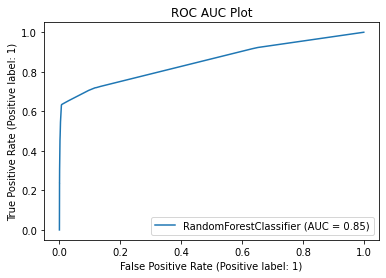

In [93]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_train,y_train)
plt.title("ROC AUC Plot")
plt.show()

# 
Final Accuracy is 95% and AUC score is 85%, which depicts that our model is working wel

# Predicting the malignant comments on the test data

In [94]:
GCV_pred=GCV.best_estimator_.predict(x_test)        #Predicting with best parameters

In [95]:
GCV_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [96]:
y_test=list(GCV_pred)

In [97]:
y_test

[1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [103]:
df=pd.read_csv(r'D:\DataTrained\Flip Robo Technology Internship\Malignant Comments Classifier Project\test.csv')

In [104]:
df

id                                       comment_text
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1       0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2       00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3       00017563c3f7919a  :If you have a look back at the source, the in...
4       00017695ad8997eb          I don't anonymously edit articles at all.
...                  ...                                                ...
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...

[153164 rows x 2 columns]

In [105]:
df['highly_malignant']=highly_malignant

In [106]:
df['rude']=rude

In [107]:
df['threat']=threat

In [108]:
df['abuse']=abuse

In [109]:
df['loathe']=loathe

In [111]:
df['Output- Malignant']=y_test

In [112]:
df

id                                       comment_text  \
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...   
1       0000247867823ef7  == From RfC == \n\n The title is fine as it is...   
2       00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...   
3       00017563c3f7919a  :If you have a look back at the source, the in...   
4       00017695ad8997eb          I don't anonymously edit articles at all.   
...                  ...                                                ...   
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...   
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...   
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...   
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...   
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...   

        highly_malignant  rude  threat  abuse  loathe  Output- Malignant  
0                      1     1       1      1       1                  1  
1                      0     0       0      0       0                  0  
2                      0     0       0      0       0                  0  
3                      0     0       0      0       0                  0  
4                      0     0       0      0       0                  0  
...                  ...   ...     ...    ...     ...                ...  
153159                 0     0       0      0       0                  0  
153160                 0     0       0      0       0                  0  
153161                 0     0       0      0       0                  0  
153162                 0     0       0      0       0                  0  
153163                 0     0       0      0       0                  0  

[153164 rows x 8 columns]

In [113]:
df.to_csv(r'D:\DataTrained\Flip Robo Technology Internship\Malignant Comments Classifier Project\outputtest.csv')